# Project: Dog vs Cat Classification

In [281]:
from pathlib import Path
import os
import torch
from torch import nn

In [282]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [283]:
data_path = Path("data/")
train_path = data_path / "train"
test_path = data_path / "test"

train_path, test_path

(WindowsPath('data/train'), WindowsPath('data/test'))

In [284]:
from PIL import Image
import random
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Dog, Shape: (500, 496, 3)')

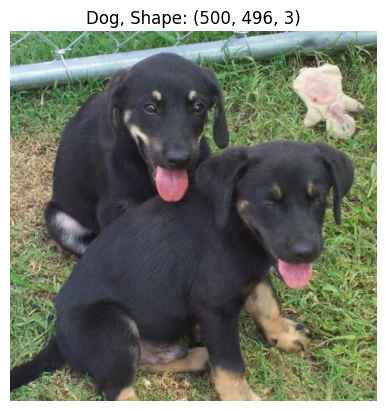

In [285]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
image_path_list = list(data_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)
img_is_array = np.asarray(img)

plt.imshow(img)
plt.axis(False)
plt.title(f"{image_class}, Shape: {img_is_array.shape}")

In [286]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [287]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [288]:
transformed_image = data_transform(img)
transformed_image

tensor([[[0.7059, 0.7098, 0.7020,  ..., 0.5176, 0.4549, 0.4549],
         [0.4902, 0.5098, 0.5216,  ..., 0.4784, 0.4863, 0.4510],
         [0.3294, 0.3451, 0.4078,  ..., 0.4431, 0.4588, 0.5255],
         ...,
         [0.4667, 0.5451, 0.5176,  ..., 0.3137, 0.1843, 0.1294],
         [0.4431, 0.4745, 0.4902,  ..., 0.3961, 0.3451, 0.2941],
         [0.4314, 0.4000, 0.5176,  ..., 0.4471, 0.4157, 0.3608]],

        [[0.8314, 0.8353, 0.8275,  ..., 0.6863, 0.6392, 0.6275],
         [0.6157, 0.6353, 0.6471,  ..., 0.6000, 0.6039, 0.5647],
         [0.4078, 0.4471, 0.5059,  ..., 0.5843, 0.5922, 0.6431],
         ...,
         [0.5020, 0.5569, 0.5608,  ..., 0.4235, 0.2471, 0.1569],
         [0.5333, 0.5529, 0.5882,  ..., 0.5529, 0.4627, 0.3804],
         [0.5216, 0.5059, 0.5843,  ..., 0.5843, 0.5059, 0.4863]],

        [[0.8471, 0.8471, 0.8510,  ..., 0.5412, 0.4510, 0.4549],
         [0.6118, 0.6314, 0.6471,  ..., 0.4980, 0.4902, 0.4235],
         [0.3059, 0.3451, 0.4039,  ..., 0.4196, 0.4471, 0.

Text(0.5, 1.0, 'Dog, Shape: torch.Size([3, 64, 64])')

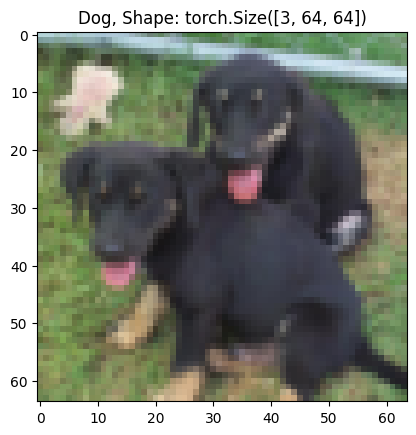

In [289]:
plt.imshow(transformed_image.permute(1, 2, 0))
plt.title(f"{image_class}, Shape: {transformed_image.shape}")

# Loading data using 'ImageFolder'

In [290]:
train_data = datasets.ImageFolder(root=train_path,
                                  transform=data_transform)

test_data = datasets.ImageFolder(root=test_path,
                                 transform=test_data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 13840
     Root location: data\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 3156
     Root location: data\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [291]:
# Get class names as list
class_names = train_data.classes
class_names

['Cat', 'Dog']

In [292]:
# Get class names as dictionary 
class_dict = train_data.class_to_idx
class_dict

{'Cat': 0, 'Dog': 1}

In [293]:
len(train_data), len(test_data)

(13840, 3156)

# Turn loaded images into 'DataLoader'

In [294]:
BATCH_SIZE = 32
NUM_WORKERS = 0

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1fbdef73be0>,
 <torch.utils.data.dataloader.DataLoader at 0x1fbdef737c0>)

In [295]:
img_custom, label_custom = next(iter(train_dataloader))

img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [296]:
class DogVsCat(nn.Module):
    def __init__(self, input_shape, hidden_layers, output_shape):
        super().__init__()

        self.conv_block_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Conv2d(in_channels=hidden_layers,
                      out_channels=hidden_layers * 2,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers*2),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.conv_block_layer_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_layers*2,
                      out_channels=hidden_layers*2*2,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers*2*2),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Conv2d(in_channels=hidden_layers*2*2,
                      out_channels=hidden_layers*2*2*2,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers*2*2*2),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.classification = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_layers*16*16*8,
                      #out_features=output_shape
                      out_features=128),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(128, output_shape)
        )

    def forward(self, x):
        #print(f"Shape: {x.shape}")
        x = self.conv_block_layer_1(x)
        #print(f"Shape: {x.shape}")
        x = self.conv_block_layer_2(x)
        #print(f"Shape: {x.shape}")
        x = self.classification(x)
        #print(f"Shape: {x.shape}")
        return x
        

In [297]:
model_0 = DogVsCat(input_shape=3, hidden_layers=16, output_shape=1).to(device)
model_0

DogVsCat(
  (conv_block_layer_1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_layer_2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6):

In [298]:
# Setup loss function and optimizer
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

loss_fn, optimizer

(BCEWithLogitsLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     weight_decay: 0
 ))

In [299]:
# Check the correct shape on dummy tensor
dummy_input = torch.randn(32, 3, 64, 64)
output = model_0(dummy_input.to(device))
output

tensor([[-0.1121],
        [ 0.0165],
        [ 0.0906],
        [-0.0489],
        [ 0.7320],
        [ 0.0073],
        [-0.7094],
        [-0.8686],
        [ 0.2931],
        [-0.2287],
        [-0.3722],
        [ 0.6666],
        [ 0.4589],
        [-0.0030],
        [ 0.4493],
        [ 0.3036],
        [-0.2136],
        [ 0.7876],
        [ 1.0929],
        [ 0.2171],
        [ 0.6319],
        [ 0.1037],
        [ 0.0735],
        [-0.2692],
        [-1.1910],
        [ 0.3667],
        [ 0.6499],
        [-0.4916],
        [-0.3713],
        [-0.0702],
        [ 0.1927],
        [ 0.3348]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [300]:
from tqdm import tqdm
import time

In [301]:
epochs = 1

start_time = time.time()

results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}

for epoch in tqdm(range(epochs)):

    model_0.train()
    train_loss, train_acc = 0, 0
    
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)

        y = y.unsqueeze(dim=1).float()
        
        y_pred = model_0(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        y_pred_class = (torch.sigmoid(y_pred) > 0.5).float()
        train_acc += (y_pred_class==y).sum().item() / len(y_pred)

    train_loss /= len(train_dataloader)
    train_acc = (train_acc / len(train_dataloader)) * 100
    
    model_0.eval()
    test_loss, test_acc = 0, 0
    
    with torch.inference_mode():
        for batch, (X, y) in enumerate(test_dataloader):
            X, y = X.to(device), y.to(device)

            y = y.unsqueeze(dim=1).float()
        
            test_pred = model_0(X)

            loss = loss_fn(test_pred, y)
            test_loss += loss.item()

            test_pred_class = (torch.sigmoid(test_pred) > 0.5).float()
            test_acc += (test_pred_class==y).sum().item() / len(test_pred)
    
        test_loss /= len(test_dataloader)
        test_acc = (test_acc / len(test_dataloader)) * 100

    print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f} | Test Loss: {test_loss}, Test Accuracy: {test_acc}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
    


end_time = time.time()
train_time = end_time - start_time

print(f"Total time: {train_time}")

100%|██████████| 1/1 [00:43<00:00, 43.63s/it]

Epoch: 0 | Train Loss: 0.8706, Train Accuracy: 52.66 | Test Loss: 0.6859800153308444, Test Accuracy: 54.861111111111114
Total time: 43.633997201919556


# Plot model_0 results

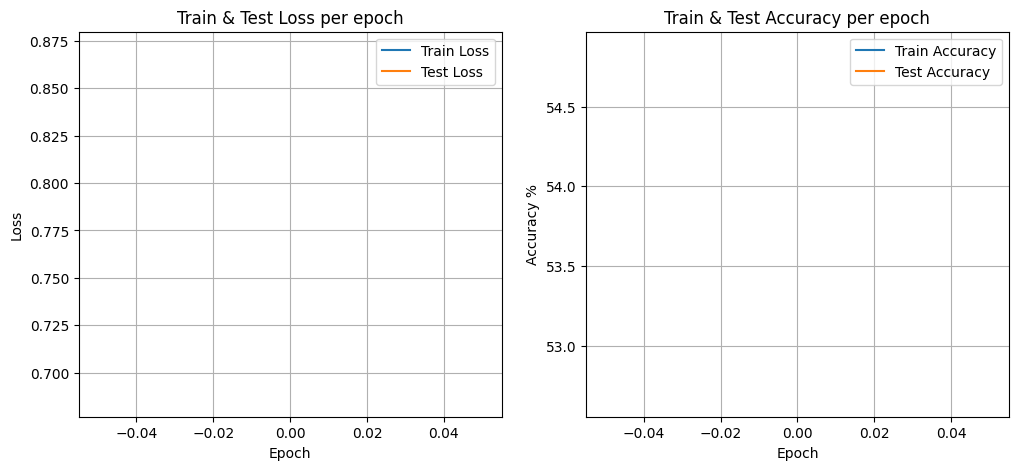

In [302]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), results["train_loss"], label="Train Loss")
plt.plot(range(epochs), results["test_loss"], label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train & Test Loss per epoch")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), results["train_acc"], label="Train Accuracy")
plt.plot(range(epochs), results["test_acc"], label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.title("Train & Test Accuracy per epoch")
plt.legend()
plt.grid()



In [303]:
print(len(results["train_loss"]), len(results["test_loss"]))
print(len(results["train_acc"]), len(results["test_acc"]))

1 1
1 1


In [304]:
# Build train and test function to make training easier
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim,
               device=device):

    train_loss, correct_preds, total_samples = 0, 0, 0
    model.train()

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y = y.unsqueeze(dim=1).float()
        
        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
        
        y_pred_class = (torch.sigmoid(y_pred) > 0.5).float()
        #train_acc += (y_pred_class==y).sum().item() / len(y_pred)
        correct_preds += (y_pred_class == y).sum().item()
        total_samples += y.size(0)

    train_loss /= len(dataloader)
    #train_acc = (train_acc / len(dataloader)) * 100
    train_acc = (correct_preds / total_samples) * 100
    
    return train_loss, train_acc

In [305]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):

    test_loss, correct_preds, total_samples = 0, 0, 0
    model.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            y = y.unsqueeze(dim=1).float()
        
            test_pred = model(X)

            loss = loss_fn(test_pred, y)
            test_loss += loss.item()

            test_pred_class = (torch.sigmoid(test_pred) > 0.5).float()
            #test_acc += (test_pred_class==y).sum().item() / len(test_pred)
            correct_preds += (test_pred_class == y).sum().item()
            total_samples += y.size(0)
    
    test_loss /= len(dataloader)
    #test_acc = (test_acc / len(dataloader)) * 100
    test_acc = (correct_preds / total_samples) * 100
    return test_loss, test_acc

# Augmentation data

In [306]:
train_data_transform_augmentation = transforms.Compose([
    #transforms.Resize(size=(64, 64)),
    transforms.RandomResizedCrop(size=(64, 64), scale=(0.9, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=25),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05),
    #transforms.RandomAffine(degrees=15, translate=(1, 1)),
    #transforms.TrivialAugmentWide(num_magnitude_bins=31), # used to differentiate the data
    transforms.GaussianBlur(kernel_size=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

test_data = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])
train_data_transform_augmentation, test_data

(Compose(
     RandomResizedCrop(size=(64, 64), scale=(0.9, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
     RandomHorizontalFlip(p=0.5)
     RandomRotation(degrees=[-25.0, 25.0], interpolation=nearest, expand=False, fill=0)
     ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.05, 0.05))
     GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0))
     ToTensor()
     Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
 ),
 Compose(
     Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
     ToTensor()
     Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
 ))

In [307]:
train_data_augmentation = datasets.ImageFolder(root=train_path,
                                               transform=train_data_transform_augmentation)
test_data_augmentation = datasets.ImageFolder(root=test_path,
                                              transform=test_data)

train_data_augmentation, test_data_augmentation

(Dataset ImageFolder
     Number of datapoints: 13840
     Root location: data\train
     StandardTransform
 Transform: Compose(
                RandomResizedCrop(size=(64, 64), scale=(0.9, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
                RandomHorizontalFlip(p=0.5)
                RandomRotation(degrees=[-25.0, 25.0], interpolation=nearest, expand=False, fill=0)
                ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.05, 0.05))
                GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0))
                ToTensor()
                Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
            ),
 Dataset ImageFolder
     Number of datapoints: 3156
     Root location: data\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.

In [308]:
BATCH_SIZE = 64
NUM_WORKERS = 4

train_dataloader_augmentation = DataLoader(dataset=train_data_augmentation,
                                           batch_size=BATCH_SIZE,
                                           num_workers=NUM_WORKERS,
                                           shuffle=True)

test_dataloader_augmentation = DataLoader(dataset=test_data_augmentation,
                                          batch_size=BATCH_SIZE,
                                          num_workers=NUM_WORKERS,
                                          shuffle=False)

train_dataloader_augmentation, test_dataloader_augmentation

(<torch.utils.data.dataloader.DataLoader at 0x1fb47b2e580>,
 <torch.utils.data.dataloader.DataLoader at 0x1fb47b211f0>)

In [309]:
len(class_names)

2

In [310]:
model_1 = DogVsCat(input_shape=3, hidden_layers=8, output_shape=1).to(device)
model_1

DogVsCat(
  (conv_block_layer_1): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_layer_2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU

In [311]:
# Setup loss function and optimizer
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.AdamW(params=model_1.parameters(), lr=0.001, weight_decay=0.01)
                             #lr=0.00025)
#optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01, momentum=0.9)
loss_fn, optimizer

(BCEWithLogitsLoss(),
 AdamW (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     weight_decay: 0.01
 ))

In [312]:
# Train model_1 on augmentation data
epochs = 50

start_time = time.time()

results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}

for epoch in tqdm(range(epochs)):

    train_loss, train_acc = train_step(model=model_1,
               dataloader=train_dataloader_augmentation,
               loss_fn=loss_fn,
               optimizer=optimizer)

    test_loss, test_acc = test_step(model=model_1,
              dataloader=test_dataloader_augmentation,
              loss_fn=loss_fn)

    print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f} | Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
    


end_time = time.time()
train_time = end_time - start_time

print(f"Total time: {train_time}")

  2%|▏         | 1/50 [00:55<45:14, 55.39s/it]

Epoch: 0 | Train Loss: 0.9578, Train Accuracy: 54.99 | Test Loss: 0.6521, Test Accuracy: 62.20


  4%|▍         | 2/50 [01:51<44:46, 55.97s/it]

Epoch: 1 | Train Loss: 0.6515, Train Accuracy: 59.75 | Test Loss: 0.6252, Test Accuracy: 62.80


  6%|▌         | 3/50 [02:49<44:28, 56.78s/it]

Epoch: 2 | Train Loss: 0.6347, Train Accuracy: 61.96 | Test Loss: 0.6123, Test Accuracy: 69.61


  8%|▊         | 4/50 [03:44<43:01, 56.12s/it]

Epoch: 3 | Train Loss: 0.6256, Train Accuracy: 63.69 | Test Loss: 0.5990, Test Accuracy: 69.55


 10%|█         | 5/50 [04:39<41:43, 55.64s/it]

Epoch: 4 | Train Loss: 0.6100, Train Accuracy: 66.28 | Test Loss: 0.6067, Test Accuracy: 71.67


 12%|█▏        | 6/50 [05:34<40:34, 55.32s/it]

Epoch: 5 | Train Loss: 0.6037, Train Accuracy: 67.02 | Test Loss: 0.5859, Test Accuracy: 68.12


 14%|█▍        | 7/50 [06:29<39:37, 55.29s/it]

Epoch: 6 | Train Loss: 0.5959, Train Accuracy: 67.86 | Test Loss: 0.5611, Test Accuracy: 71.96


 16%|█▌        | 8/50 [07:24<38:36, 55.16s/it]

Epoch: 7 | Train Loss: 0.5855, Train Accuracy: 68.81 | Test Loss: 0.5556, Test Accuracy: 71.61


 18%|█▊        | 9/50 [08:22<38:19, 56.09s/it]

Epoch: 8 | Train Loss: 0.5831, Train Accuracy: 69.51 | Test Loss: 0.5353, Test Accuracy: 75.06


 20%|██        | 10/50 [09:19<37:38, 56.46s/it]

Epoch: 9 | Train Loss: 0.5724, Train Accuracy: 70.68 | Test Loss: 0.5442, Test Accuracy: 73.67


 22%|██▏       | 11/50 [10:17<36:52, 56.74s/it]

Epoch: 10 | Train Loss: 0.5610, Train Accuracy: 71.89 | Test Loss: 0.5124, Test Accuracy: 75.22


 24%|██▍       | 12/50 [11:13<35:56, 56.74s/it]

Epoch: 11 | Train Loss: 0.5613, Train Accuracy: 71.05 | Test Loss: 0.5132, Test Accuracy: 75.29


 26%|██▌       | 13/50 [12:10<34:59, 56.74s/it]

Epoch: 12 | Train Loss: 0.5582, Train Accuracy: 71.34 | Test Loss: 0.5105, Test Accuracy: 76.77


 28%|██▊       | 14/50 [13:06<33:59, 56.65s/it]

Epoch: 13 | Train Loss: 0.5458, Train Accuracy: 72.27 | Test Loss: 0.5083, Test Accuracy: 76.27


 30%|███       | 15/50 [14:03<33:01, 56.61s/it]

Epoch: 14 | Train Loss: 0.5456, Train Accuracy: 72.57 | Test Loss: 0.4925, Test Accuracy: 75.38


 32%|███▏      | 16/50 [14:58<31:45, 56.06s/it]

Epoch: 15 | Train Loss: 0.5412, Train Accuracy: 72.97 | Test Loss: 0.5053, Test Accuracy: 75.60


 34%|███▍      | 17/50 [15:54<30:51, 56.10s/it]

Epoch: 16 | Train Loss: 0.5311, Train Accuracy: 73.73 | Test Loss: 0.4885, Test Accuracy: 77.12


 36%|███▌      | 18/50 [16:50<29:55, 56.09s/it]

Epoch: 17 | Train Loss: 0.5226, Train Accuracy: 74.54 | Test Loss: 0.5027, Test Accuracy: 75.86


 38%|███▊      | 19/50 [17:45<28:48, 55.75s/it]

Epoch: 18 | Train Loss: 0.5147, Train Accuracy: 75.09 | Test Loss: 0.4822, Test Accuracy: 77.15


 40%|████      | 20/50 [18:39<27:34, 55.16s/it]

Epoch: 19 | Train Loss: 0.5138, Train Accuracy: 75.14 | Test Loss: 0.4544, Test Accuracy: 79.82


 42%|████▏     | 21/50 [19:34<26:37, 55.07s/it]

Epoch: 20 | Train Loss: 0.5077, Train Accuracy: 75.87 | Test Loss: 0.4740, Test Accuracy: 78.42


 44%|████▍     | 22/50 [20:29<25:41, 55.05s/it]

Epoch: 21 | Train Loss: 0.5051, Train Accuracy: 75.95 | Test Loss: 0.4895, Test Accuracy: 74.94


 46%|████▌     | 23/50 [21:25<24:56, 55.44s/it]

Epoch: 22 | Train Loss: 0.4992, Train Accuracy: 76.16 | Test Loss: 0.4498, Test Accuracy: 79.28


 48%|████▊     | 24/50 [22:20<23:58, 55.33s/it]

Epoch: 23 | Train Loss: 0.4925, Train Accuracy: 76.44 | Test Loss: 0.4887, Test Accuracy: 77.69


 50%|█████     | 25/50 [23:16<23:04, 55.40s/it]

Epoch: 24 | Train Loss: 0.4837, Train Accuracy: 77.46 | Test Loss: 0.4386, Test Accuracy: 80.39


 52%|█████▏    | 26/50 [24:11<22:11, 55.47s/it]

Epoch: 25 | Train Loss: 0.4869, Train Accuracy: 77.02 | Test Loss: 0.4398, Test Accuracy: 79.40


 54%|█████▍    | 27/50 [25:07<21:14, 55.42s/it]

Epoch: 26 | Train Loss: 0.4779, Train Accuracy: 78.09 | Test Loss: 0.4298, Test Accuracy: 80.58


 56%|█████▌    | 28/50 [26:01<20:14, 55.19s/it]

Epoch: 27 | Train Loss: 0.4720, Train Accuracy: 78.09 | Test Loss: 0.4193, Test Accuracy: 81.21


 58%|█████▊    | 29/50 [26:56<19:17, 55.13s/it]

Epoch: 28 | Train Loss: 0.4677, Train Accuracy: 78.82 | Test Loss: 0.4416, Test Accuracy: 80.42


 60%|██████    | 30/50 [27:51<18:20, 55.04s/it]

Epoch: 29 | Train Loss: 0.4652, Train Accuracy: 78.71 | Test Loss: 0.4518, Test Accuracy: 79.02


 62%|██████▏   | 31/50 [28:45<17:18, 54.67s/it]

Epoch: 30 | Train Loss: 0.4613, Train Accuracy: 78.66 | Test Loss: 0.4691, Test Accuracy: 77.03


 64%|██████▍   | 32/50 [29:39<16:22, 54.59s/it]

Epoch: 31 | Train Loss: 0.4568, Train Accuracy: 78.25 | Test Loss: 0.4003, Test Accuracy: 81.84


 66%|██████▌   | 33/50 [30:34<15:27, 54.56s/it]

Epoch: 32 | Train Loss: 0.4514, Train Accuracy: 79.32 | Test Loss: 0.4102, Test Accuracy: 80.61


 68%|██████▊   | 34/50 [31:29<14:37, 54.87s/it]

Epoch: 33 | Train Loss: 0.4542, Train Accuracy: 78.92 | Test Loss: 0.4623, Test Accuracy: 78.36


 70%|███████   | 35/50 [32:23<13:38, 54.54s/it]

Epoch: 34 | Train Loss: 0.4469, Train Accuracy: 79.20 | Test Loss: 0.3947, Test Accuracy: 82.57


 72%|███████▏  | 36/50 [33:18<12:44, 54.58s/it]

Epoch: 35 | Train Loss: 0.4522, Train Accuracy: 79.39 | Test Loss: 0.4457, Test Accuracy: 79.66


 74%|███████▍  | 37/50 [34:12<11:49, 54.57s/it]

Epoch: 36 | Train Loss: 0.4440, Train Accuracy: 79.64 | Test Loss: 0.3978, Test Accuracy: 82.22


 76%|███████▌  | 38/50 [35:08<11:00, 55.00s/it]

Epoch: 37 | Train Loss: 0.4312, Train Accuracy: 80.64 | Test Loss: 0.4027, Test Accuracy: 81.59


 78%|███████▊  | 39/50 [36:05<10:11, 55.59s/it]

Epoch: 38 | Train Loss: 0.4311, Train Accuracy: 80.16 | Test Loss: 0.3923, Test Accuracy: 81.97


 80%|████████  | 40/50 [37:00<09:13, 55.30s/it]

Epoch: 39 | Train Loss: 0.4314, Train Accuracy: 80.46 | Test Loss: 0.3634, Test Accuracy: 84.70


 82%|████████▏ | 41/50 [38:00<08:30, 56.69s/it]

Epoch: 40 | Train Loss: 0.4299, Train Accuracy: 80.62 | Test Loss: 0.4289, Test Accuracy: 80.01


 84%|████████▍ | 42/50 [38:56<07:32, 56.57s/it]

Epoch: 41 | Train Loss: 0.4312, Train Accuracy: 80.55 | Test Loss: 0.4105, Test Accuracy: 81.50


 86%|████████▌ | 43/50 [39:52<06:35, 56.49s/it]

Epoch: 42 | Train Loss: 0.4253, Train Accuracy: 80.62 | Test Loss: 0.3679, Test Accuracy: 83.97


 88%|████████▊ | 44/50 [40:48<05:37, 56.18s/it]

Epoch: 43 | Train Loss: 0.4211, Train Accuracy: 81.26 | Test Loss: 0.3486, Test Accuracy: 85.08


 90%|█████████ | 45/50 [41:42<04:37, 55.59s/it]

Epoch: 44 | Train Loss: 0.4246, Train Accuracy: 80.72 | Test Loss: 0.3615, Test Accuracy: 84.25


 92%|█████████▏| 46/50 [42:37<03:41, 55.46s/it]

Epoch: 45 | Train Loss: 0.4087, Train Accuracy: 81.52 | Test Loss: 0.3649, Test Accuracy: 84.35


 94%|█████████▍| 47/50 [43:33<02:46, 55.49s/it]

Epoch: 46 | Train Loss: 0.4132, Train Accuracy: 81.32 | Test Loss: 0.3558, Test Accuracy: 84.03


 96%|█████████▌| 48/50 [44:26<01:49, 54.93s/it]

Epoch: 47 | Train Loss: 0.4089, Train Accuracy: 81.64 | Test Loss: 0.4180, Test Accuracy: 81.05


 98%|█████████▊| 49/50 [45:22<00:54, 54.98s/it]

Epoch: 48 | Train Loss: 0.4066, Train Accuracy: 82.13 | Test Loss: 0.3390, Test Accuracy: 85.30


100%|██████████| 50/50 [46:17<00:00, 55.55s/it]

Epoch: 49 | Train Loss: 0.4047, Train Accuracy: 82.10 | Test Loss: 0.3608, Test Accuracy: 83.62
Total time: 2777.3689217567444


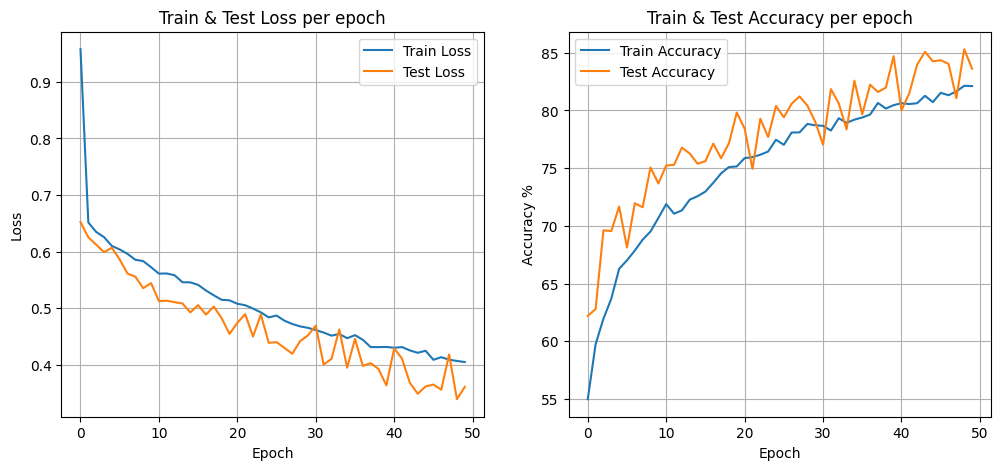

In [313]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), results["train_loss"], label="Train Loss")
plt.plot(range(epochs), results["test_loss"], label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train & Test Loss per epoch")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), results["train_acc"], label="Train Accuracy")
plt.plot(range(epochs), results["test_acc"], label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.title("Train & Test Accuracy per epoch")
plt.legend()
plt.grid()

In [314]:
from torch.utils.data import Subset

In [315]:
train_100_images = Subset(train_data_augmentation, range(100))
test_20_images = Subset(test_data_augmentation, range(20))

len(train_100_images), len(test_20_images)

(100, 20)